# Report study 01
Registered report: A coding-indpendent function of gene and psuedogene mRNAs regulates tumour biology

## Import libraries

In [1]:
import pandas as pd
from scipy.stats import shapiro, levene
from statsmodels.formula.api import ols
from statsmodels.api import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multitest import multipletests
from statsmodels.multivariate.manova import MANOVA
from sklearn.preprocessing import StandardScaler

## Protocol 1
Quantative PCR after miR transfection

### [Import data](https://osf.io/efvrs)


In [2]:
data = pd.read_csv("data/Study_1_protocol_1_qPCR_Data.csv")
data

,Sample,Target,Bio_rep,Tech_rep,Cq_36B4,Cq_Actin,Cq_PTEN,Cq_PTENP1
0,1,siLuc,1,1,19.173930,17.447433,24.301085,29.292576
1,1,siLuc,1,2,18.830300,17.122871,24.048058,28.750217
2,1,siLuc,1,3,19.131717,17.313650,24.318525,29.003423
3,2,miR19b,1,1,18.851771,17.486182,24.279004,29.280183
4,2,miR19b,1,2,18.920350,17.644964,24.273985,28.934185
...,...,...,...,...,...,...,...,...
67,23,miR20a,6,2,18.445929,17.180244,23.853842,29.808641
68,23,miR20a,6,3,18.482267,17.164726,24.043568,30.186486
69,24,Untransfected,6,1,19.643174,17.580334,24.635855,31.108039
70,24,Untransfected,6,2,19.511646,17.540498,24.435515,31.493541


### Analysis

In [3]:
def shapiro_wilk_and_levene(data, column_names):
    levene_rows = []
    normalisers = {}
    for column_name in column_names:
        print(f"Shapiro-Wilk for {column_name}: {shapiro(data[column_name])}")
        qqplot(data[column_name])
        levene_rows.append(data[column_name])
        normalisers[column_name] = StandardScaler().fit(
            [[datapoint] for datapoint in data[column_name]]
        )
        data[f"{column_name}_standard"] = [
            datapoint[0]
            for datapoint in normalisers[column_name].transform(
                [[datapoint] for datapoint in data[column_name]]
            )
        ]
    print(f"Levene: {levene(*levene_rows[:-1])}")
    return data, normalisers

def protocol1_analysis(data, column):
    print(f"MANOVA analysis for {column}")
    print(
        MANOVA.from_formula(
            f"C(Target) ~ {column}",
            data=data[data["Target"].isin(["siLuc", "miR19b", "miR20a"])],
        ).mv_test()
    )
    formula = f"{column} ~ C(Target)"
    lm = ols(formula, data[data["Target"].isin(["siLuc", "miR19b"])]).fit()
    print(f"ANOVA analysis for {column} with targets siLuc and miR19b")
    print(lm.summary())
    print(anova_lm(lm))
    formula = f"{column} ~ C(Target)"
    lm = ols(formula, data[data["Target"].isin(["siLuc", "miR20a"])]).fit()
    print(f"ANOVA analysis for {column} with targets siLuc and miR20a")
    print(lm.summary())
    print(anova_lm(lm))

**Shapiro-Wilk test and Levene test**

Shapiro-Wilk for Cq_36B4: ShapiroResult(statistic=0.987586498260498, pvalue=0.7041038274765015)
Shapiro-Wilk for Cq_Actin: ShapiroResult(statistic=0.8178163170814514, pvalue=5.3428305335501136e-08)
Shapiro-Wilk for Cq_PTEN: ShapiroResult(statistic=0.8790109157562256, pvalue=4.864089532929938e-06)
Shapiro-Wilk for Cq_PTENP1: ShapiroResult(statistic=nan, pvalue=1.0)
Levene: LeveneResult(statistic=2.0844863310953077, pvalue=0.12690084915833996)


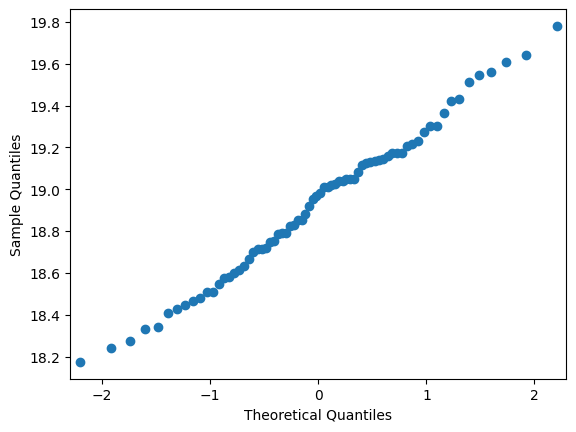

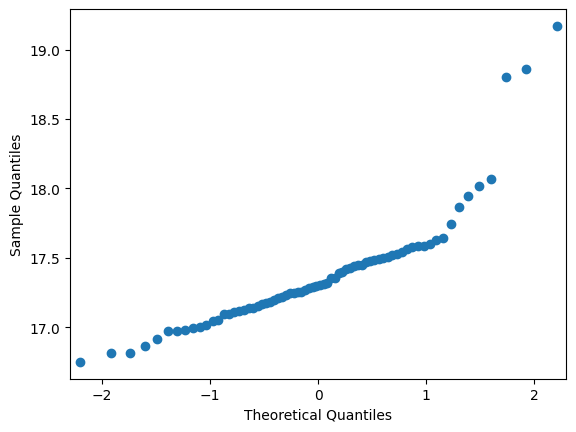

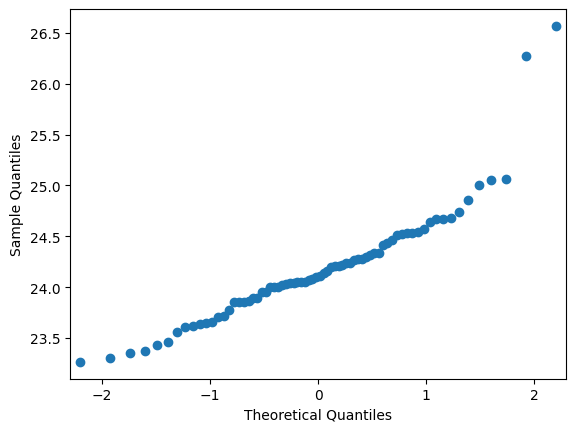

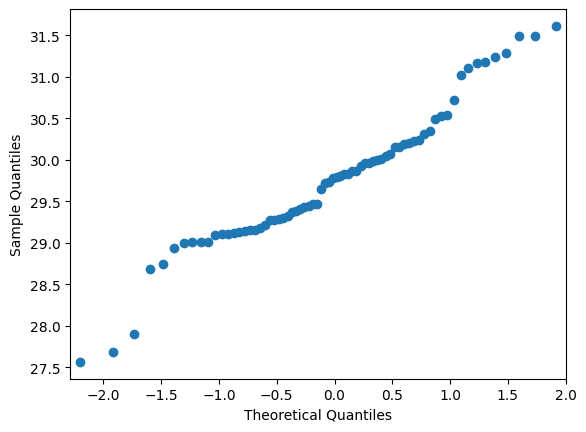

In [4]:
column_names = ["Cq_36B4", "Cq_Actin", "Cq_PTEN", "Cq_PTENP1"]
data, normalisers = shapiro_wilk_and_levene(data, column_names)

**MANOVA and ANOVA**

In [5]:
for column_name in column_names:
    protocol1_analysis(data, column_name + "_standard")

MANOVA analysis for Cq_36B4_standard
                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.0000 3.0000 50.0000     inf 0.0000
         Pillai's trace 1.0000 3.0000 50.0000     inf 0.0000
 Hotelling-Lawley trace    inf 3.0000 50.0000     inf 0.0000
    Roy's greatest root    inf 3.0000 50.0000     inf 0.0000
------------------------------------------------------------
                                                            
------------------------------------------------------------
    Cq_36B4_standard    Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.9084 2.0000 51.0000  2.5719 0.0863
         Pillai's trace 0.0918 2.0000 51.0000  2.5781 0.0858
 Hote

/home/jannik-gut/miniconda3/envs/reproducibility_hackathon/lib/python3.11/site-packages/statsmodels/multivariate/multivariate_ols.py:168: RuntimeWarning: divide by zero encountered in scalar divide
  eigv1 = np.array([i / (1 - i) for i in eigv2])
/home/jannik-gut/miniconda3/envs/reproducibility_hackathon/lib/python3.11/site-packages/statsmodels/multivariate/multivariate_ols.py:199: RuntimeWarning: divide by zero encountered in scalar divide
  F = (1 - lmd) / lmd * df2 / df1
/home/jannik-gut/miniconda3/envs/reproducibility_hackathon/lib/python3.11/site-packages/statsmodels/multivariate/multivariate_ols.py:209: RuntimeWarning: divide by zero encountered in scalar divide
  F = df2 / df1 * V / (s - V)
/home/jannik-gut/miniconda3/envs/reproducibility_hackathon/lib/python3.11/site-packages/statsmodels/multivariate/multivariate_ols.py:168: RuntimeWarning: divide by zero encountered in scalar divide
  eigv1 = np.array([i / (1 - i) for i in eigv2])
/home/jannik-gut/miniconda3/envs/reproducibili

## Protocol 2
### [Import AUC data](https://osf.io/d65gu)
### [Import absorption data](https://osf.io/vwu6d)

In [6]:
auc_data = pd.read_csv("data/Study_1_Protocol_2_AUC.csv")
auc_data

,treatment,AUC,Repeat
0,Untransfected,28.216667,1
1,Untransfected,42.129730,2
2,Untransfected,43.459239,3
3,Untransfected,50.112676,4
4,Untransfected,40.281250,5
5,SiLUC,27.146552,1
6,SiLUC,14.931452,2
7,SiLUC,14.337500,3
8,SiLUC,25.653061,4
9,SiLUC,21.173469,5


In [7]:
absorption_array = [
    [
        "treatment",
        "Day0",
        "Day1",
        "Day2",
        "Day3",
        "Day4",
        "Day5",
    ],
    ["Untransfected", 1, 1.889482, 4.657466, 8.20607, 14.92044, 21.3329],
    ["SiLUC", 1, 1.806047, 2.918309, 4.21260, 6.117074, 10.18875],
    ["siPTen", 1, 1.380741, 2.661187, 4.12525, 7.025456, 12.15085],
    ["siPTENP1", 1, 1.965311, 4.119877, 7.29807, 13.42901, 24.12403],
    ["PTENPTENP1sp", 1, 1.9136, 4.167691, 7.66188, 13.38172, 24.96025],
]
absorption_data = pd.DataFrame(absorption_array[1:], columns=absorption_array[0])
absorption_data

,treatment,Day0,Day1,Day2,Day3,Day4,Day5
0,Untransfected,1,1.889482,4.657466,8.20607,14.920440,21.33290
1,SiLUC,1,1.806047,2.918309,4.21260,6.117074,10.18875
2,siPTen,1,1.380741,2.661187,4.12525,7.025456,12.15085
3,siPTENP1,1,1.965311,4.119877,7.29807,13.429010,24.12403
4,PTENPTENP1sp,1,1.913600,4.167691,7.66188,13.381720,24.96025


### Analysis

In [8]:
def protocol2_analysis(data, target_column):
    comparisons = [
        ("SiLUC", "siPTen"),
        ("SiLUC", "siPTENP1"),
        ("SiLUC", "PTENPTENP1sp"),
        ("PTENPTENP1sp", "siPTen"),
        ("PTENPTENP1sp", "siPTENP1"),
    ]
    formula = f"{target_column} ~ C(treatment)"
    for first, second in comparisons:
        print(f"Comparison of {first} with {second}")
        specified_data = data[data["treatment"].isin((first, second))]
        lm = ols(formula, specified_data).fit()
        print(lm.summary())
        anova_table = anova_lm(lm)
        print(anova_table)
        # Bonferroni
        print("Bonferroni")
        print(
            multipletests(
                anova_table["PR(>F)"].dropna(), alpha=0.025, method="bonferroni"
            )
        )

**Shapiro-Wilk test and Levene test**

Shapiro-Wilk for AUC: ShapiroResult(statistic=0.9325029850006104, pvalue=0.09929066896438599)


ValueError: Must enter at least two input sample vectors.

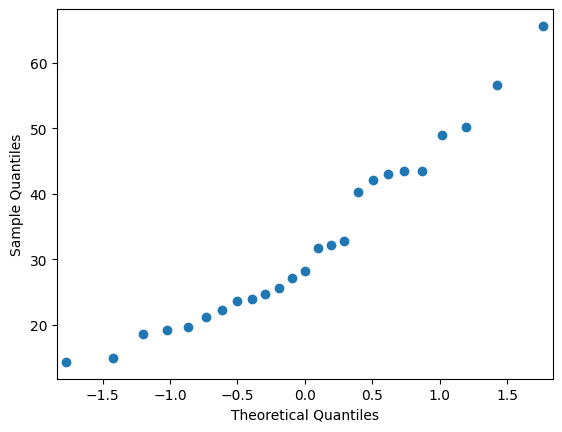

In [9]:
_, _ = shapiro_wilk_and_levene(auc_data, ["AUC"])

Shapiro-Wilk for Day5: ShapiroResult(statistic=0.8464969396591187, pvalue=0.18369729816913605)


ValueError: Must enter at least two input sample vectors.

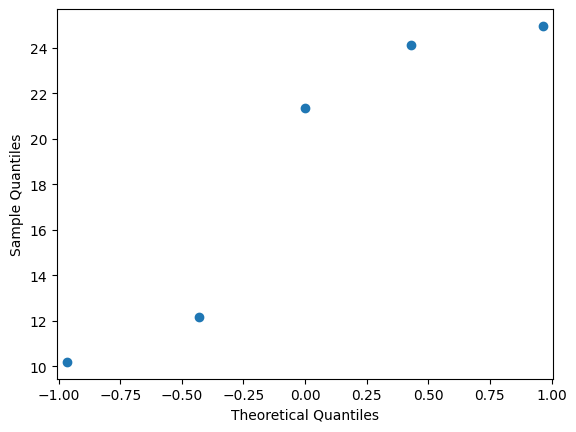

In [10]:
_, _ = shapiro_wilk_and_levene(absorption_data, ["Day5"])

In [11]:
protocol2_analysis(auc_data, "AUC")

Comparison of SiLUC with siPTen
                            OLS Regression Results                            
Dep. Variable:                    AUC   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.104
Method:                 Least Squares   F-statistic:                    0.1502
Date:                Mon, 08 May 2023   Prob (F-statistic):              0.708
Time:                        22:45:15   Log-Likelihood:                -28.264
No. Observations:                  10   AIC:                             60.53
Df Residuals:                       8   BIC:                             61.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

/home/jannik-gut/miniconda3/envs/reproducibility_hackathon/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/jannik-gut/miniconda3/envs/reproducibility_hackathon/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/jannik-gut/miniconda3/envs/reproducibility_hackathon/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/jannik-gut/miniconda3/envs/reproducibility_hackathon/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kur

In [12]:
protocol2_analysis(absorption_data, "Day5")

Comparison of SiLUC with siPTen
                            OLS Regression Results                            
Dep. Variable:                   Day5   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 08 May 2023   Prob (F-statistic):                nan
Time:                        22:45:17   Log-Likelihood:                 64.397
No. Observations:                   2   AIC:                            -124.8
Df Residuals:                       0   BIC:                            -127.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

/home/jannik-gut/miniconda3/envs/reproducibility_hackathon/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/home/jannik-gut/miniconda3/envs/reproducibility_hackathon/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/jannik-gut/miniconda3/envs/reproducibility_hackathon/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/jannik-gut/miniconda3/envs/reproducibility_hackathon/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: divide by zero encountered in scalar divide
  r

ZeroDivisionError: float division by zero

**only one datapoint per treatment in data &rightarrow; ZeroDivisionError**

## Protocol 3
### [Import data](https://osf.io/5dp68)

In [13]:
data = pd.read_csv("data/Cq_P3_031617.csv")
data

,Target,Replicate,Cq_36B4,Cq_Actin,Cq_PTEN,Cq_PTENP1
0,untransfected,1,17.44,16.08,22.99,30.44
1,untransfected,1,17.37,16.01,22.96,30.41
2,untransfected,1,17.62,15.84,23.00,30.22
3,siLuc,1,17.72,15.62,23.29,30.09
4,siLuc,1,17.52,15.56,23.55,30.19
...,...,...,...,...,...,...
70,siPTENP1,5,19.68,16.85,25.61,33.48
71,siPTENP1,5,19.66,17.08,25.69,33.24
72,siPTEN/PTENP1,5,19.34,16.86,26.72,32.77
73,siPTEN/PTENP1,5,19.40,16.82,26.78,33.17


### Analysis

In [14]:
def protocol3_analysis(data, column):
    print(f"MANOVA analysis for {column}")
    print(
        MANOVA.from_formula(
            f"C(Target) ~ {column}",
            data=data[data["Target"].isin(["siLuc", "siPTENP1", "siPTEN/PTENP1"])],
        ).mv_test()
    )
    formula = f"{column} ~ C(Target)"
    lm = ols(formula, data[data["Target"].isin(["siLuc", "siPTEN"])]).fit()
    print(f"ANOVA analysis for {column} with targets siLuc and siPTEN")
    print(lm.summary())
    print(anova_lm(lm))
    formula = f"{column} ~ C(Target)"
    lm = ols(formula, data[data["Target"].isin(["siLuc", "siPTENP1"])]).fit()
    print(f"ANOVA analysis for {column} with targets siLuc and siPTENP1")
    print(lm.summary())
    print(anova_lm(lm))
    formula = f"{column} ~ C(Target)"
    lm = ols(formula, data[data["Target"].isin(["siLuc", "siPTEN/PTENP1"])]).fit()
    print(f"ANOVA analysis for {column} with targets siLuc and siPTEN/PTENP1")
    print(lm.summary())
    print(anova_lm(lm))

**Shapiro-Wilk test and Levene test**

Shapiro-Wilk for Cq_36B4: ShapiroResult(statistic=0.8242849707603455, pvalue=5.169299299723207e-08)
Shapiro-Wilk for Cq_Actin: ShapiroResult(statistic=0.23744463920593262, pvalue=7.63271397656262e-18)
Shapiro-Wilk for Cq_PTEN: ShapiroResult(statistic=0.8928728103637695, pvalue=1.115873055823613e-05)
Shapiro-Wilk for Cq_PTENP1: ShapiroResult(statistic=0.9436253309249878, pvalue=0.002264362992718816)
Levene: LeveneResult(statistic=3.168455710586697, pvalue=0.04397750506585729)


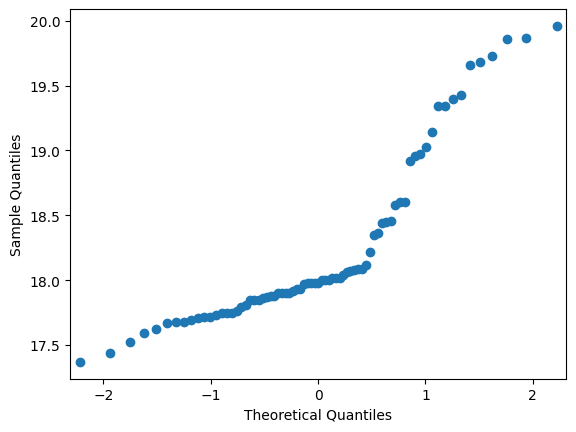

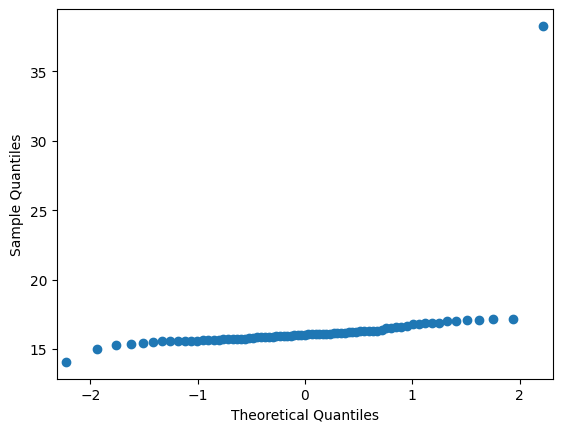

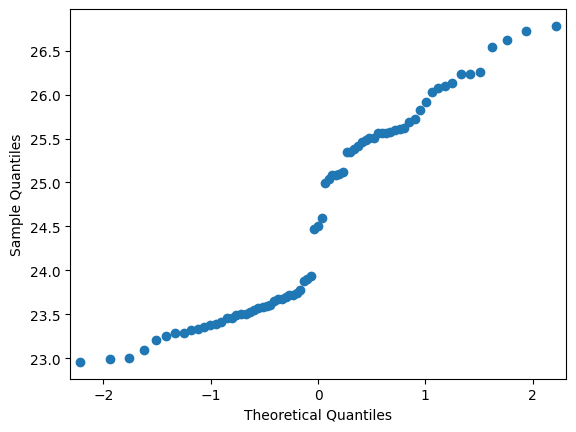

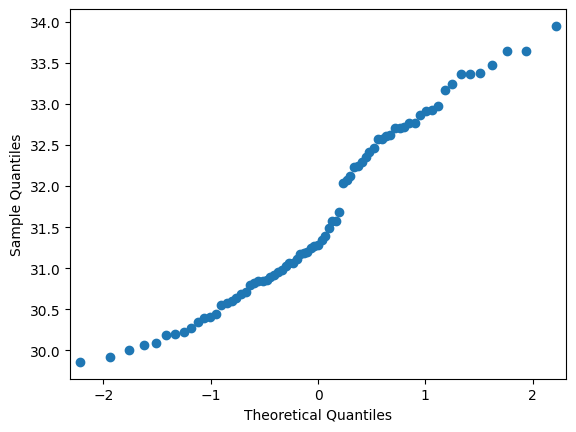

In [15]:
columns = ["Cq_36B4", "Cq_Actin", "Cq_PTEN", "Cq_PTENP1"]
data, _ = shapiro_wilk_and_levene(data, columns)

**MANOVA and ANOVA**

In [16]:
for column in columns:
    protocol3_analysis(data, column+ "_standard")

MANOVA analysis for Cq_36B4_standard
                                 Multivariate linear model
                                                                                            
--------------------------------------------------------------------------------------------
       Intercept                Value          Num DF  Den DF         F Value         Pr > F
--------------------------------------------------------------------------------------------
          Wilks' lambda                -0.0000 3.0000 41.0000 -61549194907396792.0000 1.0000
         Pillai's trace                 1.0000 3.0000 41.0000 -61549194907396792.0000 1.0000
 Hotelling-Lawley trace -4503599627370497.0000 3.0000 41.0000 -61549194907396792.0000 1.0000
    Roy's greatest root -4503599627370497.0000 3.0000 41.0000 -61549194907396792.0000 1.0000
--------------------------------------------------------------------------------------------
                                                                   

## Protocol 4

Confirmatory analysis plan <br />
This replication attempt will perform the following statistical analysis listed below.<br />
■Statistical Analysis:<br />
○Note: at the time of analysis, we will perform the Shapiro–Wilk test and generate a quantile–quantile plot to assess the normality of the data. We will also perform Levene’s test to assess homoscedasticity. If the data appear skewed we will perform the appropriate transformation inorder to proceed with the proposed statistical analysis. If this is not possible we will perform the equivalent non-parametric test.<br />


### [Import data](https://osf.io/95cmp)

In [17]:
data = pd.read_csv("data/Study_1_Protocol_4_Data.csv")
data

,Repeat,Unnamed: 1,Hsp90.raw,Hsp90.background,hsp90.corrected,Pten.norm.Hsp90
0,1,Untransfected,115,37,78,0.820513
1,1,SiLUC,124,30,94,0.691489
2,1,Pten,107,32,75,0.560000
3,1,Ptenp1,146,26,120,0.458333
4,1,Pten/ptenp1,101,24,77,0.116883
5,2,Untransfected,178,84,94,0.297872
6,2,SiLUC,181,82,99,0.272727
7,2,Pten,174,82,92,0.076087
8,2,Ptenp1,178,82,96,0.166667
9,2,Pten/ptenp1,187,86,101,0.059406


**Shapiro-Wilk test and Levene test**

Shapiro-Wilk for  Hsp90.raw: ShapiroResult(statistic=0.9261247515678406, pvalue=0.07075543701648712)
Shapiro-Wilk for Hsp90.background: ShapiroResult(statistic=0.7422038316726685, pvalue=2.8479855245677754e-05)
Shapiro-Wilk for hsp90.corrected: ShapiroResult(statistic=0.9641509652137756, pvalue=0.5031609535217285)
Shapiro-Wilk for Pten.norm.Hsp90: ShapiroResult(statistic=0.9163461923599243, pvalue=0.04232637584209442)
Levene: LeveneResult(statistic=2.253989855251763, pvalue=0.11233819633272497)


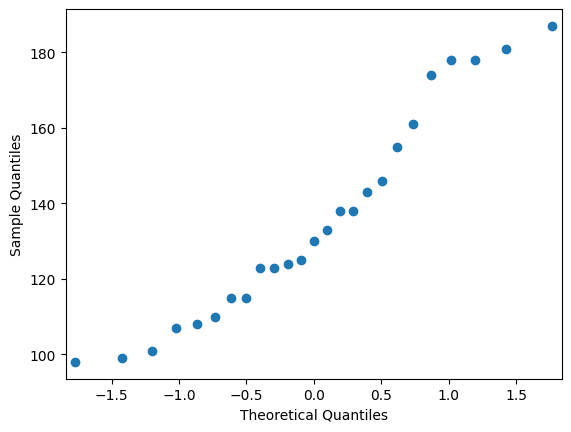

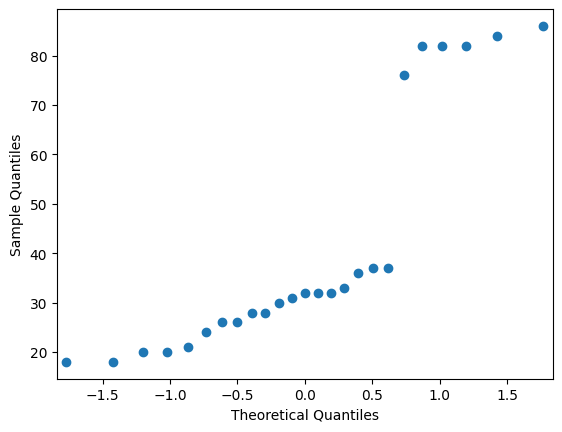

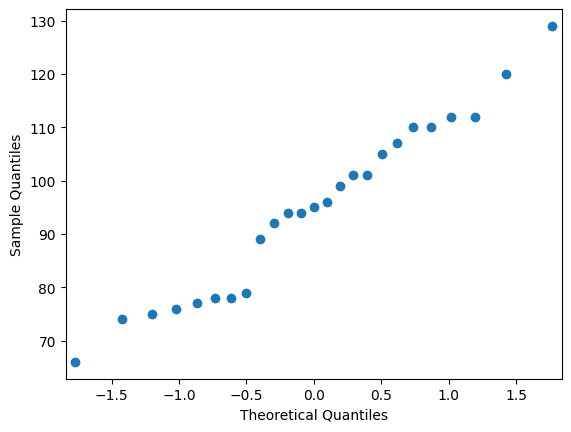

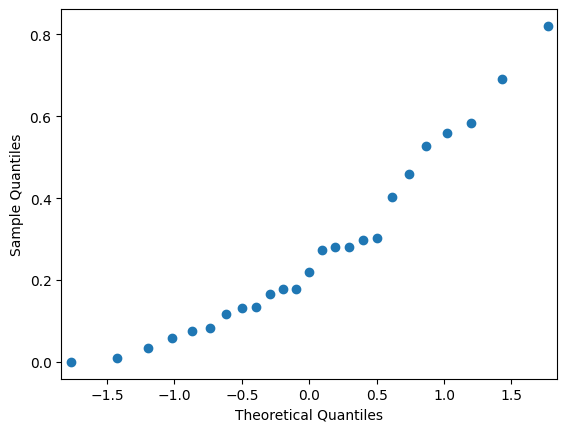

In [18]:
data, _ = shapiro_wilk_and_levene(
    data, [" Hsp90.raw", "Hsp90.background", "hsp90.corrected", "Pten.norm.Hsp90"]
)

○Two-way ANOVA of normalized PTEN levels in siLuc, siPTEN, siPTENP1, or siPTEN/PTENP1 siRNA transfected cells with the following planned comparisons using the Bonferroni correction:<br />
1. siLuc compared to siPTEN.<br />
2. siLuc compared to siPTENP1.<br />
3. siLuc compared to siPTEN/PTENP1.<br />
4. siPTEN/PTENP1 compared to siPTEN.<br />
5. siPTEN/PTENP1 compared to siPTENP1.<br />

## Protocol 5
Confirmatory analysis plan<br />
This replication attempt will perform the following statistical analysis listed below.<br />
■Statistical Analysis:<br />
○Note: at the time of analysis, we will perform the Shapiro–Wilk test and generate a quantile–quantileplot to assess the normality of the data. We will also perform Levene’s test to assess homoscedasticity.If the data appear skewed we will perform the appropriate transformation in order to proceed with theproposed statistical analysis. If this is not possible we will perform the equivalent non-parametric test. <br />
○Unpaired two-tailedt-test ofPTENP1mRNA levels of pCMV transfected cells compared topCMV/PTEN3′UTR transfected cells.

## Protocol 6
Confirmatory analysis plan<br />
This replication attempt will perform the following statistical analysis listed below.<br />
■Statistical Analysis:<br />
○Note: at the time of analysis, we will perform the Shapiro–Wilk test and generate a quantile–quantile plot to assess the normality of the data. We will also perform Levene’s test to assesshomoscedasticity. If the data appear skewed we will perform the appropriate transformation inorder to proceed with the proposed statistical analysis. If this is not possible we will perform theequivalent non-parametric test.<br />
○Unpaired two-tailed t-test of Day 5 absorbance of pCMV transfected cells compared to pCMV/PTEN3′UTR transfected cells

### Environment

In [19]:
with open("../environment.yml", "r") as f:
    content = f.read()
print(content)

name: reproducibility_hackathon
channels:
  - conda-forge
  - defaults
dependencies:
  - _libgcc_mutex=0.1=conda_forge
  - _openmp_mutex=4.5=2_gnu
  - bzip2=1.0.8=h7f98852_4
  - ca-certificates=2022.12.7=ha878542_0
  - ld_impl_linux-64=2.40=h41732ed_0
  - libexpat=2.5.0=hcb278e6_1
  - libffi=3.4.2=h7f98852_5
  - libgcc-ng=12.2.0=h65d4601_19
  - libgomp=12.2.0=h65d4601_19
  - libnsl=2.0.0=h7f98852_0
  - libsqlite=3.40.0=h753d276_1
  - libuuid=2.38.1=h0b41bf4_0
  - libzlib=1.2.13=h166bdaf_4
  - ncurses=6.3=h27087fc_1
  - openssl=3.1.0=hd590300_3
  - pip=23.1.2=pyhd8ed1ab_0
  - python=3.11.3=h2755cc3_0_cpython
  - readline=8.2=h8228510_1
  - setuptools=67.7.2=pyhd8ed1ab_0
  - tk=8.6.12=h27826a3_0
  - wheel=0.40.0=pyhd8ed1ab_0
  - xz=5.2.6=h166bdaf_0
  - pip:
      - anyio==3.6.2
      - argon2-cffi==21.3.0
      - argon2-cffi-bindings==21.2.0
      - arrow==1.2.3
      - asttokens==2.2.1
      - attrs==23.1.0
      - backcall==0.2.0
      - beautifulsoup4==4.12.2
      - bleach==6.0.0
   